In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import zipfile

In [7]:
zip = zipfile.ZipFile('archive (1).zip')
zip.extractall()

In [39]:
df=pd.read_csv('default of credit card clients.csv')
df=df.dropna(how='any')
df=df.drop(columns=['ID'])
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [63]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [64]:
y=y.reshape(len(y),1)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [66]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=500,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1000,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1500,activation='relu'))
ann.add(tf.keras.layers.Dense(units=2000,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [67]:
ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = ann.fit(X_train, y_train, batch_size=1500, epochs=100, validation_data=(X_test, y_test))
ann.save("CCD.h5")

Epoch 1/100
15/15 [==============================] - 14s 883ms/step - loss: 1.3542 - accuracy: 0.7228 - val_loss: 0.5044 - val_accuracy: 0.7863
Epoch 2/100
15/15 [==============================] - 13s 869ms/step - loss: 0.4966 - accuracy: 0.7937 - val_loss: 0.4696 - val_accuracy: 0.8125
Epoch 3/100
15/15 [==============================] - 13s 873ms/step - loss: 0.4607 - accuracy: 0.8156 - val_loss: 0.4576 - val_accuracy: 0.8145
Epoch 4/100
15/15 [==============================] - 13s 870ms/step - loss: 0.4654 - accuracy: 0.8105 - val_loss: 0.4453 - val_accuracy: 0.8215
Epoch 5/100
15/15 [==============================] - 13s 872ms/step - loss: 0.4535 - accuracy: 0.8160 - val_loss: 0.4449 - val_accuracy: 0.8187
Epoch 6/100
15/15 [==============================] - 13s 871ms/step - loss: 0.4492 - accuracy: 0.8182 - val_loss: 0.4428 - val_accuracy: 0.8204
Epoch 7/100
15/15 [==============================] - 13s 867ms/step - loss: 0.4439 - accuracy: 0.8197 - val_loss: 0.4437 - val_accuracy:

Saved Model & Graph to disk


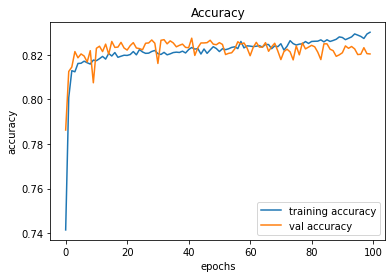

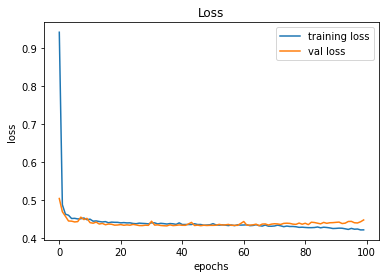

In [68]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')
print("Saved Model & Graph to disk")

In [69]:
model = tf.keras.models.load_model('CCD.h5')
print("Loaded model from disk")

Loaded model from disk


In [70]:
res = model.predict(X_test)
res=np.round(res)
np.set_printoptions(precision=2)
print(res)

[[1.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [71]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for the algorithm=>{}%".format(round(accuracy_score(y_test,res)*100),2))

Accuracy Score for the algorithm=>82%
